<a href="https://colab.research.google.com/github/ved1beta/fast.ai/blob/main/fast1lec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [13]:
from fastbook import *

In [26]:
urls = search_images_ddg('dog photos' ,max_images =18)
len(urls),urls[7]

(18, 'https://images6.alphacoders.com/678/678636.jpg')

In [30]:
from fastdownload import download_url
dest='dog.jpg'
download_url(urls[0],dest, show_progress=False)
from fastai.vision.all import *

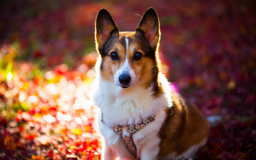

In [31]:
im =Image.open(dest)
im.to_thumb(256,256)

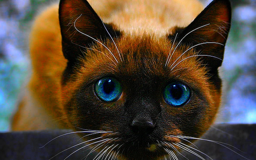

In [52]:
download_url(search_images_ddg('cat photos' , max_images=1)[0],'cat.jpg',show_progress=False)
Image.open('cat.jpg').to_thumb(256,256)

In [53]:
searches='dog','cat'
path=Path('dog_or_not')
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest,urls=search_images_ddg(f'{o}photo'))
    resize_images(path/o,max_size=400,dest=path/o)

In [54]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

23

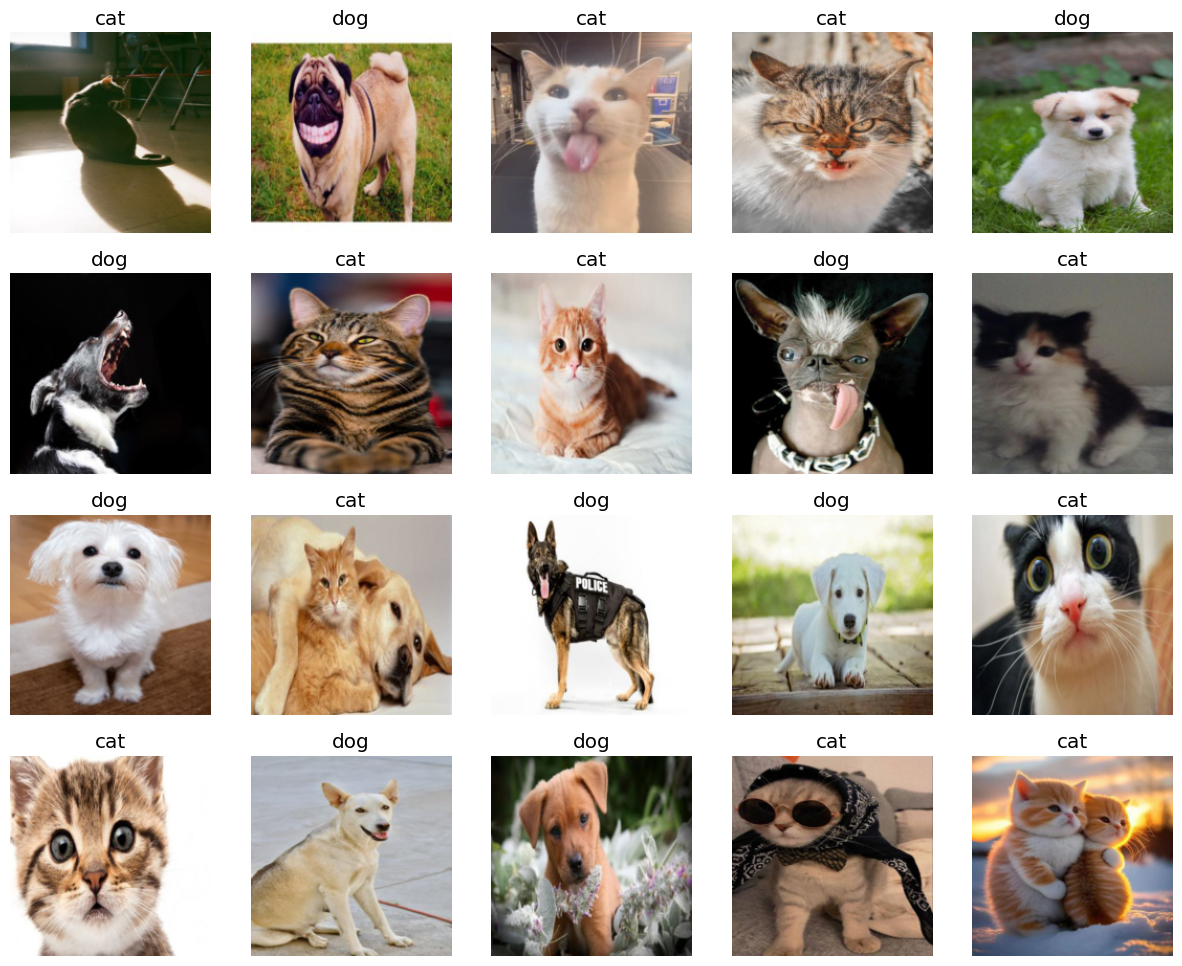

In [55]:
dls=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method ='squish')]
).dataloaders(path)
dls.show_batch(max_n=20)

In [56]:
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.172350,0.117483,0.060606,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.266585,0.113445,0.030303,00:13
1,0.167641,0.095821,0.030303,00:14
2,0.114900,0.080423,0.030303,00:13
3,0.085374,0.071790,0.030303,00:13
4,0.072825,0.058437,0.030303,00:13


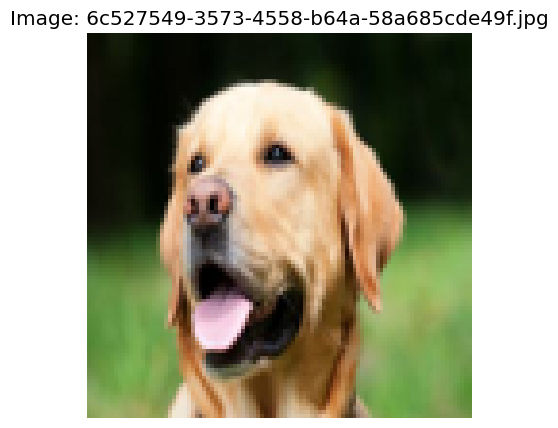

ye ak dog hai T_T
Class probabilities: tensor([1.7314e-06, 1.0000e+00])


In [68]:
import matplotlib.pyplot as plt
import os
import random

dog_folder = os.path.join('dog_or_not', 'dog')


image_files = [f for f in os.listdir(dog_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
random_image = random.choice(image_files)


image_path = os.path.join(dog_folder, random_image)

img = PILImage.create(image_path)

# Create a figure with a specific size
plt.figure(figsize=(5, 5))  # This will make the figure smaller

# Display the image, resizing it to 256x256
plt.imshow(img.resize((100, 100)))
plt.axis('off')
plt.title(f"Image: {random_image}")
plt.show()


is_dog, _, probs = learn.predict(img)


print(f"ye ak {is_dog} hai T_T")
print(f"Class probabilities: {probs}")